In [2]:
import os
import re
from PIL import Image
import matplotlib.pyplot as plt

# Folder containing images like "user3,1.png"
folder = "/Users/hamza/Desktop/folder_use"

# Users and gesture indices you want to display
users = ["user3", "user5", "user8"]
gesture_indices = ["1", "2", "3"]

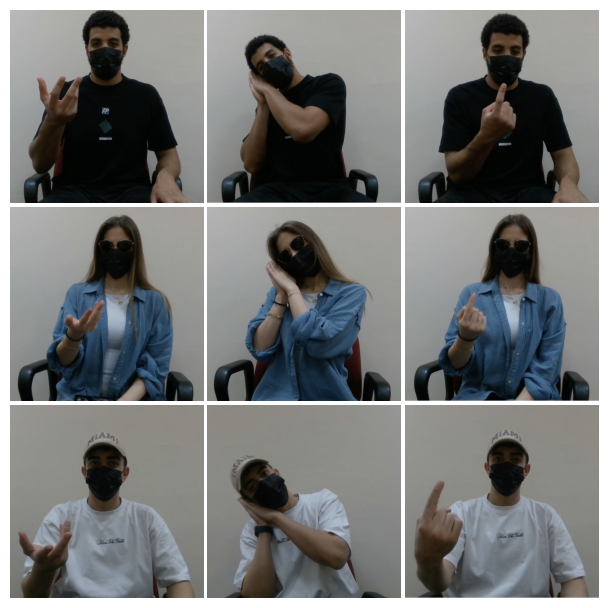

In [8]:
# Center crop to a square
def center_crop_square(img):
    w, h = img.size
    side = min(w, h)
    left = (w - side) // 2
    top = (h - side) // 2
    right = left + side
    bottom = top + side
    return img.crop((left, top, right, bottom))

# Helper: load image matching "userX,Y"
def load_image(user, idx):
    prefix = f"{user},{idx}"
    for fname in os.listdir(folder):
        if fname.startswith(prefix) and fname.lower().endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder, fname)
            return Image.open(img_path).convert("RGB")
    raise FileNotFoundError(f"No image found for {user},{idx}")

# Create figure (square overall, subtle grid spacing)
fig, axes = plt.subplots(
    nrows=len(users),
    ncols=len(gesture_indices),
    figsize=(6, 6),  # square figure
    gridspec_kw={"wspace": 0.02, "hspace": 0.02}
)

for r, user in enumerate(users):
    for c, idx in enumerate(gesture_indices):
        img = load_image(user, idx)
        img = center_crop_square(img)

        axes[r, c].imshow(img)
        axes[r, c].axis("off")

# Keep a thin white border around the grid and slight spacing inside
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.02, hspace=0.02)

plt.show()